In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../agaricus-lepiota.data")
df.describe()

,edibility,cap-shape,cap-surface,cap-color,bruises?,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


65.5 % of mushrooms in grasses is edible.
28.8 % of mushrooms in leaves is edible.
87.7 % of mushrooms in meadows is edible.
11.9 % of mushrooms in paths is edible.
26.1 % of mushrooms in urban is edible.
100.0 % of mushrooms in waste is edible.
59.7 % of mushrooms in woods is edible.


<BarContainer object of 7 artists>

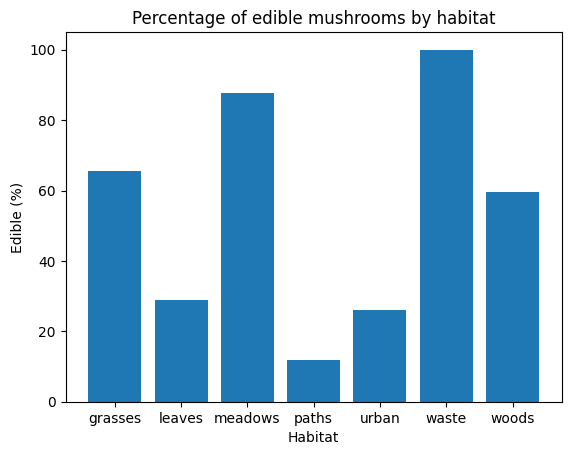

In [73]:
habitats = {
    "g": "grasses",
    "l": "leaves",
    "m": "meadows",
    "p": "paths",
    "u": "urban",
    "w": "waste",
    "d": "woods"
}

edible_percentages = []
for h in habitats.keys():
    habitat_df = df[:][df["habitat"] == h]
    edible_in_habitat_df = habitat_df[:][habitat_df["edibility"] == "e"]

    edible_percent = round(len(edible_in_habitat_df.index) * 100 / len(habitat_df.index), 1)
    edible_percentages.append(edible_percent)
    print(f"{edible_percent} % of mushrooms in {habitats[h]} is edible.")

plt.title("Percentage of edible mushrooms by habitat")
plt.xlabel("Habitat")
plt.ylabel("Edible (%)")
plt.bar(habitats.values(), edible_percentages)

100.0 % of mushrooms that are abundant are edible.
84.7 % of mushrooms that are clustered are edible.
100.0 % of mushrooms that are numerous are edible.
70.5 % of mushrooms that are scattered are edible.
29.5 % of mushrooms that are several are edible.
62.1 % of mushrooms that are solitary are edible.


<BarContainer object of 6 artists>

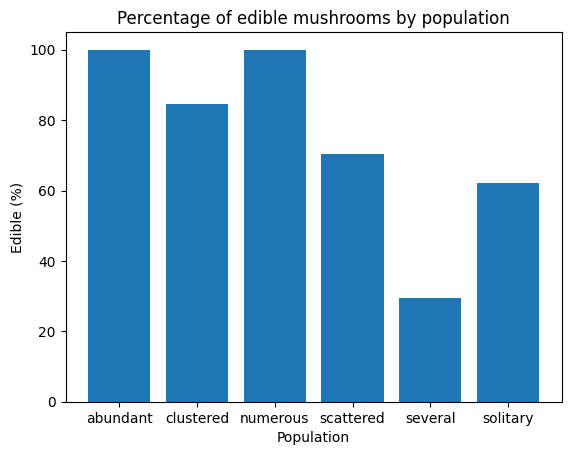

In [75]:
populations = {
    "a": "abundant",
    "c": "clustered",
    "n": "numerous",
    "s": "scattered",
    "v": "several",
    "y": "solitary"
}

edible_percentages = []
for p in populations.keys():
    population_df = df[:][df["population"] == p]
    edible_with_population_df = population_df[:][population_df["edibility"] == "e"]

    edible_percent = round(len(edible_with_population_df.index) * 100 / len(population_df.index), 1)
    edible_percentages.append(edible_percent)
    print(f"{edible_percent} % of mushrooms that are {populations[p]} are edible.")

plt.title("Percentage of edible mushrooms by population")
plt.xlabel("Population")
plt.ylabel("Edible (%)")
plt.bar(populations.values(), edible_percentages)

In [49]:
dummy_df = df.copy()
dummy_df = pd.get_dummies(dummy_df, columns=[
    "edibility", "cap-shape", "cap-surface", "cap-color", "bruises?", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape",
    "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
    "ring-number", "ring-type", "spore-print-color", "population", "habitat"
])
dummy_df.describe()

,edibility_e,edibility_p,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.482029,0.055638,0.000492,0.387986,0.101920,0.003939,0.450025,0.285574,0.000492,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.499708,0.229235,0.022185,0.487321,0.302562,0.062641,0.497527,0.451715,0.022185,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


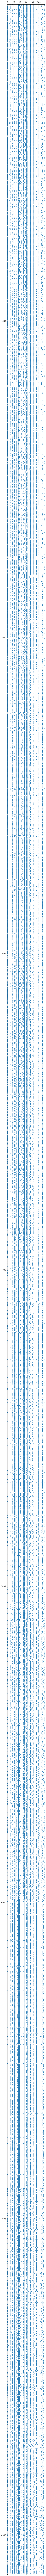

In [70]:
plt.spy(dummy_df, markersize=1)
fig = plt.gcf()
fig.set_size_inches(80, 250)
plt.plot()
plt.show()
